1. Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

In [2]:
import numpy as np
a = np.random.rand(30).reshape(10, 3)
print(a)
print(a[np.arange(10), np.argmin(np.abs(a - 0.5), axis = 1)])

[[0.57387176 0.24399886 0.50969164]
 [0.00369088 0.02534856 0.30555275]
 [0.57830497 0.39913623 0.28714603]
 [0.95772737 0.21368072 0.15267904]
 [0.20354013 0.28072928 0.74156164]
 [0.7092336  0.18042943 0.48516521]
 [0.5008313  0.7184597  0.74420136]
 [0.23329079 0.96515873 0.85272081]
 [0.74620498 0.82010796 0.5190842 ]
 [0.59115443 0.6312551  0.93035393]]
[0.50969164 0.30555275 0.57830497 0.21368072 0.28072928 0.48516521
 0.5008313  0.23329079 0.5190842  0.59115443]


2. Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.

In [3]:
import numpy as np
a = np.random.rand(36).reshape(6, 6)
print(a)
print(np.sum(a,1)/np.min(a,0))

[[0.58204232 0.74943175 0.67743553 0.61478173 0.31056886 0.23194615]
 [0.26002847 0.21907199 0.30273443 0.25510273 0.70288649 0.51792992]
 [0.85505114 0.59526388 0.56015932 0.12152651 0.26876049 0.54100527]
 [0.69648347 0.79098986 0.87707277 0.15742846 0.39737831 0.49326446]
 [0.49394713 0.74434371 0.21791551 0.57045857 0.27762358 0.58791641]
 [0.9888708  0.75648227 0.48225576 0.55523409 0.66039024 0.03862578]]
[12.17638342 10.30599135 13.49957433 28.08125906 10.76127271 90.14339467]


3. На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

In [4]:
import numpy as np
a = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
zero = a == 0
print (a[1:][zero[:-1]].max())

5


4. Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.

In [5]:
import numpy as np
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
print(x + np.bincount(i, minlength = len(x)));

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


5. Написать функцию, реализующую алгоритм k-means. Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html. Функция должна содержать только один цикл while (for).

In [8]:
import numpy as np

def k_means(x, k, t = 1000, eps = 1e-05):
    n = x.shape[0]
    d = x.shape[1] 
    ncent = x[:k,:] #centroids
    cent = np.zeros((k,d))
    ndist = n * d * k * np.max(x) ** 2 
    dist = 0
    x = np.expand_dims(x, axis = 1) # dim (x) = n*1*d
    i = 0
    while np.abs(ndist - dist) > eps and i < t:
        cent = ncent
        dist = ndist
        clust = np.argmin(((x - ncent) ** 2).sum(axis = 2), axis = 1) # dim (x-ncent) = n*k*d
        M = np.zeros(n * k * d).reshape(n, k, d)
        M[np.arange(n), clust] = (x - ncent)[np.arange(n),clust] / np.bincount(clust)[clust].reshape(n, 1)
        ncent = cent + M.sum(axis = 0)
        clust = np.argmin(((x - ncent) ** 2).sum(axis = 2),axis = 1) #clust[i] = klaster's number for x[i]
        M = np.zeros(n * k * d).reshape(n, k, d)
        M[np.arange(n), clust] = (x - ncent)[np.arange(n), clust]
        ndist = np.sqrt((M ** 2).sum(axis = 2)).sum(axis = 1).mean()
        i = i + 1
    return ncent, ndist

6. С помощью реализованной функции kmeans выделить кластеры клиентов в разрезах возраст-доход, возрвст-покупательский индекс, доход-покупательский индекс. В каждом случае использовать elbow method для определения оптимального числа кластеров. Визуализировать полученные кластеры (каждый кластер изобразить собственным цветом). Дать интерпретацию полученным кластерам.

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.vq import kmeans
  

url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)

#функция, сопоставляющая точке номер кластера к которому она относится
def f_clust(data, codebook):
    k = len(codebook)
    d = np.arange(0, k)
    it = np.ones((k, len(data)))
    it[d] = np.arange(0, len(data))
    it = it.astype(int)
    dim1 = (data[it, 0] - codebook[d, 0].reshape(k, 1))**2
    dim2 = (data[it, 1] - codebook[d, 1].reshape(k, 1))**2
    clust_num = ((dim1 + dim2)**(1/2)).argmin(axis = 0).astype(int)
    clusters = []
    for j in range(k):
        clusters.append(data[clust_num == j])
    return clusters


#проверка (все верно)

print(k_means(data,3))
print(kmeans(data,3)) 


(array([[ 34.51470588,   0.41176471,  38.02941176,  32.11764706,
         50.29411765],
       [102.5       ,   0.44117647,  41.95588235,  61.35294118,
         48.86764706],
       [168.484375  ,   0.46875   ,  36.421875  ,  89.9375    ,
         51.515625  ]]), 34.6832499637399)
(array([[ 31.01639344,   0.39344262,  36.91803279,  30.36065574,
         49.73770492],
       [166.5       ,   0.45588235,  36.04411765,  88.91176471,
         50.20588235],
       [ 96.98591549,   0.46478873,  43.1971831 ,  59.35211268,
         50.5915493 ]]), 34.66184741147261)


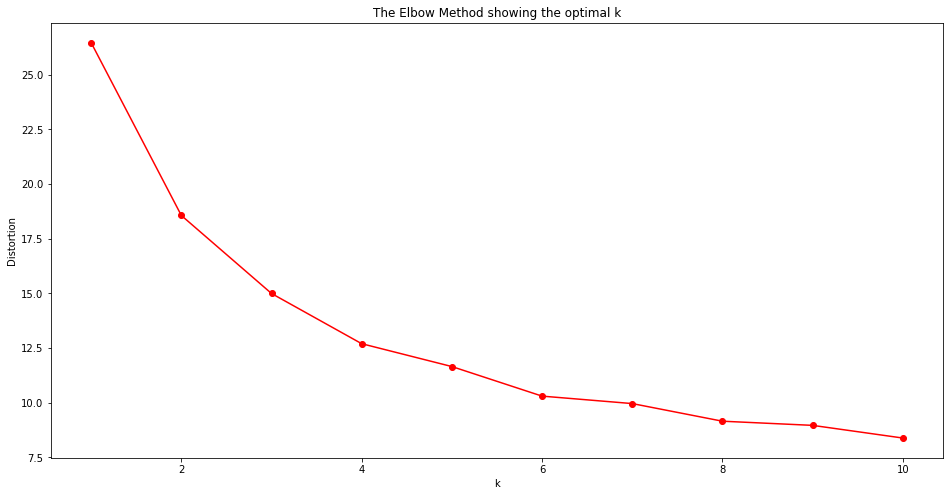

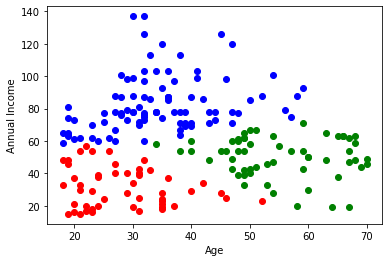

In [36]:
#Age-Annual Income

distortions = []
K = range(1,11)
for k in K:
    distortions.append(k_means(data[:,[2,3]], k)[1])

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'o-r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#Thus, k = 3

codebook, distortion = k_means(data[:,[2,3]], 3)
clusters = f_clust(data[:,[2,3]], codebook)
plt.scatter(clusters[0][:,0], clusters[0][:,1], c='r')
plt.scatter(clusters[1][:,0], clusters[1][:,1], c='g')
plt.scatter(clusters[2][:,0], clusters[2][:,1], c='b')

plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()


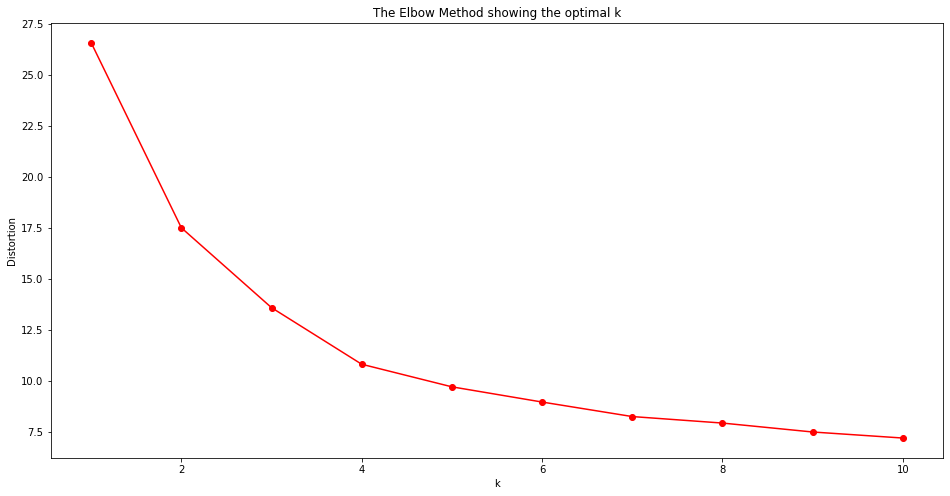

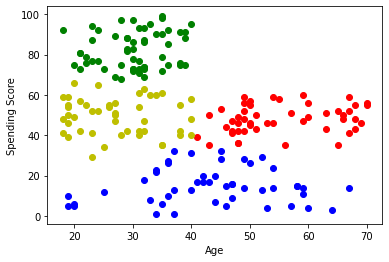

In [37]:
#Age-Spending Score

distortions = []
K = range(1,11)
for k in K:
    distortions.append(k_means(data[:,[2,4]], k)[1])
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'o-r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#Thus, k = 4

codebook, distortion = k_means(data[:,[2,4]], 4)
clusters = f_clust(data[:,[2,4]], codebook)
plt.scatter(clusters[0][:,0], clusters[0][:,1], c='r')
plt.scatter(clusters[1][:,0], clusters[1][:,1], c='g')
plt.scatter(clusters[2][:,0], clusters[2][:,1], c='b')
plt.scatter(clusters[3][:,0], clusters[3][:,1], c='y')

plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

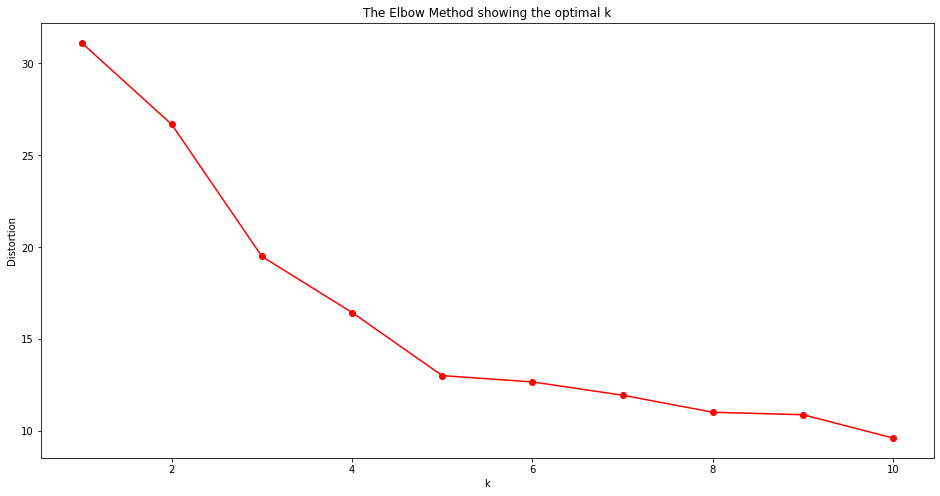

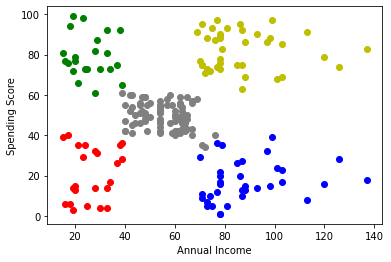

In [38]:
#Annual Income-Spending Score

distortions = []
K = range(1,11)
for k in K:
    distortions.append(k_means(data[:,[3,4]], k)[1])
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'o-r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#Thus, k = 5

codebook, distortion = k_means(data[:,[3,4]], 5)
clusters = pcl(data[:,[3,4]], codebook)
plt.scatter(clusters[0][:,0], clusters[0][:,1], c='r')
plt.scatter(clusters[1][:,0], clusters[1][:,1], c='g')
plt.scatter(clusters[2][:,0], clusters[2][:,1], c='b')
plt.scatter(clusters[3][:,0], clusters[3][:,1], c='y')
plt.scatter(clusters[4][:,0], clusters[4][:,1], c='grey')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()